# Text emotion detection

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\HP 440 G5\Downloads\updated_emotion_dataset.csv")

In [4]:
df.head(10)

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...
5,fear,I'm expecting an extremely important phonecall...
6,sadness,.Couldnt wait to see them live. If missing th...
7,surprise,maken Tip 2: Stop op een moment dat je het hel...
8,surprise,En dan krijg je ff een cadeautje van een tweep...
9,surprise,@1116am Drummer Boy bij op verzoek van @BiemO...


In [5]:
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4065
neutral      2255
disgust       856
shame         146
thinking       10
happy           7
confused        3
Name: count, dtype: int64

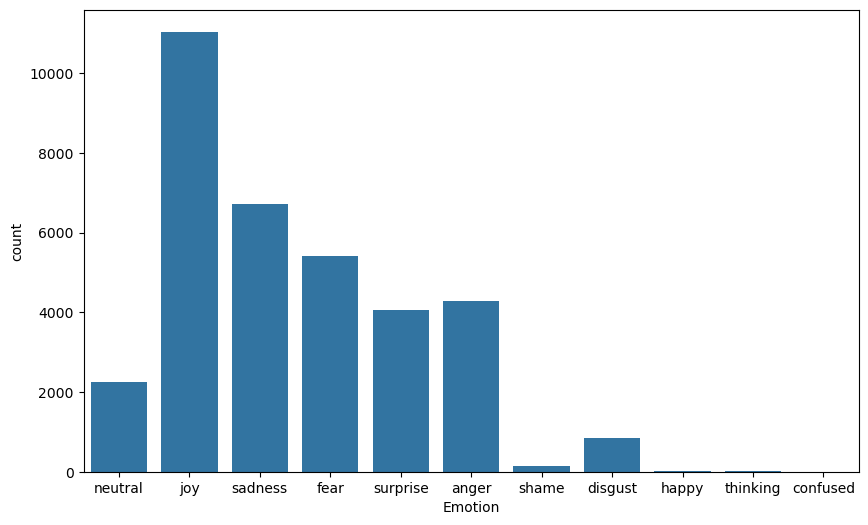

In [6]:
plt.figure(figsize=(10, 6))  # Width = 10, Height = 6 (adjust as needed)
sns.countplot(x='Emotion', data=df)
plt.show()

In [9]:
import neattext.functions as nfx

df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [10]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [11]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [12]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34811,neutral,I need to calm down and think,need calm think
34812,surprise,"Well, that was unexpected","Well, unexpected"
34813,thinking,Hmm... let me rethink that,Hmm... let rethink
34814,confused,I honestly don't know what to feel,honestly know feel


In [13]:
x = df['Clean_Text']
y = df['Emotion']

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [16]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

E:\Anaconda setup\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6222115844901867

In [17]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svc', SVC(kernel = 'rbf', C = 10))])
pipe_svm.fit(x_train,y_train)
pipe_svm.score(x_test,y_test)

0.6242221158449018

In [18]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf', RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(x_train,y_train)
pipe_rf.score(x_test,y_test)

0.5636189564384874

In [19]:
import joblib
import neattext.functions as nfx

In [20]:
pipeline_file = open("text_emotion.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

In [ ]:
model = joblib.load("text_emotion.pkl")

print("--- Emotion Detector --- (Type 'quit' to exit)")
while True:
    user_input = input("\nEnter a sentence: ")
    if user_input.lower() == 'quit':
        break
    
    clean_text = nfx.remove_userhandles(user_input)
    clean_text = nfx.remove_stopwords(clean_text)
    emotion = model.predict([clean_text])[0]
    
    print(f"Predicted Emotion: {emotion}")

--- Emotion Detector --- (Type 'quit' to exit)



Enter a sentence:  hahaha how are you doing


Predicted Emotion: neutral



Enter a sentence:  you are so funny 


Predicted Emotion: neutral



Enter a sentence:  hahaha!


Predicted Emotion: neutral



Enter a sentence:  funny 


Predicted Emotion: neutral



Enter a sentence:  haha good one


Predicted Emotion: surprise



Enter a sentence:  haha


Predicted Emotion: surprise



Enter a sentence:  how dare you ..?


Predicted Emotion: anger



Enter a sentence:  huhhhh


Predicted Emotion: neutral



Enter a sentence:  no worries


Predicted Emotion: neutral



Enter a sentence:  good one


Predicted Emotion: neutral
